#Importo le librerie e i singoli dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import keras
import matplotlib.pyplot as plt
import seaborn as sns


errori = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_errors.csv') #errori che non fermano la macchina, sono di cinque tipi
failure = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_failures.csv') #blocchi della macchina dovuti ai componenti
macchine = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_machines.csv') #dati sui modelli e l'età delle macchina
maint = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_maint.csv') #Le volte in cui ad un componente è stata fatta manutenzione, o preventiva o per fallimento
telemetry = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_telemetry.csv')
maint['datetime'] = pd.to_datetime(maint['datetime'])
maint = maint[maint['datetime'].dt.year != 2014]



#Dataset Ordinato per Eventi

In [2]:

tabella_errori = errori.pivot_table(index='machineID', columns='errorID', aggfunc='size', fill_value=0)
tabella_errori.columns = ['error' + str(i) for i in range(1, len(tabella_errori.columns) + 1)]
tabella_errori['error_tot'] = tabella_errori.sum(axis=1)
#print(tabella_errori)

tabella_failure = failure.pivot_table(index='machineID', columns='failure', aggfunc='size', fill_value=0)
tabella_failure.columns = ['fail_comp' + str(i) for i in range(1, len(tabella_failure.columns) + 1)]
tabella_failure['fail_tot'] = tabella_failure.sum(axis=1)
print(tabella_failure.isna().any().any())
print(tabella_failure)

tabella_maint = maint.pivot_table(index='machineID', columns='comp', aggfunc='size', fill_value=0)
tabella_maint.columns = ['main_tot_comp' + str(i) for i in range(1, len(tabella_maint.columns) + 1)]
tabella_maint['main_tot'] = tabella_maint.sum(axis=1)
print(tabella_maint)

tabella_tot1 = pd.merge(tabella_errori, tabella_failure, on='machineID', how='left')
tabella_tot = pd.merge(tabella_tot1, tabella_maint, on='machineID', how='left')
tabella_tot['main_pre_comp1'] = tabella_tot['main_tot_comp1'] - tabella_tot['fail_comp1']
tabella_tot['main_pre_comp2'] = tabella_tot['main_tot_comp2'] - tabella_tot['fail_comp2']
tabella_tot['main_pre_comp3'] = tabella_tot['main_tot_comp3'] - tabella_tot['fail_comp3']
tabella_tot['main_pre_comp4'] = tabella_tot['main_tot_comp4'] - tabella_tot['fail_comp4']
tabella_tot['main_pre_tot'] = tabella_tot['main_pre_comp1'] + tabella_tot['main_pre_comp2'] + tabella_tot['main_pre_comp3'] + tabella_tot['main_pre_comp4']
tabella_tot = pd.merge(tabella_tot, macchine[['machineID', 'age', 'model']], on='machineID', how='left')
tabella_tot['model'] = tabella_tot['model'].replace({'model1': 1, 'model2': 2, 'model3': 3, 'model4':4})
tabella_tot = tabella_tot.fillna(0).astype(int)
print(tabella_tot.isna().any().any())
print(tabella_tot)


False
           fail_comp1  fail_comp2  fail_comp3  fail_comp4  fail_tot
machineID                                                          
1                   1           2           0           4         7
2                   1           3           0           0         4
3                   1           4           0           0         5
4                   2           4           0           0         6
5                   4           3           0           0         7
...               ...         ...         ...         ...       ...
96                  0           0           5           0         5
97                  0           1           3           4         8
98                  4           4           5           3        16
99                  2           6           6           5        19
100                 2           1           0           0         3

[98 rows x 5 columns]
           main_tot_comp1  main_tot_comp2  main_tot_comp3  main_tot_comp4  \
machineID 

<ipython-input-2-d5c961371bcc>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tabella_tot['model'] = tabella_tot['model'].replace({'model1': 1, 'model2': 2, 'model3': 3, 'model4':4})


#Dataset Ordinato per Tempi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import keras

errori = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_errors.csv') #errori che non fermano la macchina, sono di cinque tipi
failure = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_failures.csv') #blocchi della macchina dovuti ai componenti
macchine = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_machines.csv') #dati sui modelli e l'età delle macchina
maint = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_maint.csv') #Le volte in cui ad un componente è stata fatta manutenzione, o preventiva o per fallimento
telemetry = pd.read_csv('/content/drive/MyDrive/Tesina - DM/PdM_telemetry.csv')

telemetry['datetime'] = pd.to_datetime(telemetry['datetime']) # Convert to datetime
failure['datetime'] = pd.to_datetime(failure['datetime']) # Convert to datetime
errori['datetime'] = pd.to_datetime(errori['datetime']) # Convert to datetime
maint['datetime'] = pd.to_datetime(maint['datetime'])  # Convert to datetime

maint_cols = pd.get_dummies(maint['comp'],prefix='main')
maint = pd.concat([maint, maint_cols], axis=1)
maint = maint.drop('comp', axis=1)


conteggio_comp1 = failure['failure'].value_counts()['comp1']
print(f"Numero di comp1 nella colonna 'comp': {conteggio_comp1}")

# Crea un nuovo DataFrame con una colonna per ogni evento
fail_cols = pd.get_dummies(failure['failure'],prefix='fail')
failure = pd.concat([failure, fail_cols], axis=1)
failure = failure.drop('failure', axis=1)

conteggio_fail_comp1 = failure['fail_comp1'].sum()
print(f"Numero di fail_comp1=1, dopo: {conteggio_fail_comp1}")

error_cols = pd.get_dummies(errori['errorID'])
errori = pd.concat([errori, error_cols], axis=1)
errori = errori.drop('errorID', axis=1)

df_unito_nan1 = maint.merge(failure, on=['datetime', 'machineID'], how='left')
df_unito_con_errori = pd.concat([df_unito_nan1, errori], axis=0, ignore_index=True)
df_unito1 = df_unito_con_errori.fillna(0)

conteggio_fail_comp1 = df_unito1['fail_comp1'].sum()
print(f"Numero di fail_comp1=1, dopo il merge: {conteggio_fail_comp1}")

# Raggruppa per 'datetime' e 'machineID' e applica una funzione di aggregazione
df_unito1 = df_unito1.groupby(['datetime', 'machineID'], as_index=False).agg({
    # Mantieni le colonne 'datetime' e 'machineID' senza modifiche
    'datetime': 'first',
    'machineID': 'first',
    # Per le colonne, applica la funzione 'max'
    # In questo modo, se un componente è stato manutenuto,
    # la colonna corrispondente avrà valore 1
    'error1': 'max',
    'error2': 'max',
    'error3': 'max',
    'error4': 'max',
    'error5': 'max',
    'fail_comp1': 'max',
    'fail_comp2': 'max',
    'fail_comp3': 'max',
    'fail_comp4': 'max',
    'main_comp1': 'max',
    'main_comp2': 'max',
    'main_comp3': 'max',
    'main_comp4': 'max',
})

conteggio_fail_comp1 = failure['fail_comp1'].sum()
print(f"Numero di fail_comp1=1, dopo merge e canc duplicati: {conteggio_fail_comp1}")

df_unito = telemetry.merge(df_unito1, on=['datetime', 'machineID'], how='left') \
                    .merge(macchine, on='machineID', how='left')
df_unito = df_unito.fillna(0)

# Crea un dizionario che mappa i valori originali ai nuovi valori numerici
mapping = {'model1': 1, 'model2': 2, 'model3': 3, 'model4':4}
df_unito['model'] = df_unito['model'].replace(mapping)

# Converti le colonne booleane in interi (0 e 1)
df_unito = df_unito.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Visualizzazione delle prime righe con le nuove feature
print(df_unito)

Numero di comp1 nella colonna 'comp': 192
Numero di fail_comp1=1, dopo: 192
Numero di fail_comp1=1, dopo il merge: 282
Numero di fail_comp1=1, dopo merge e canc duplicati: 192


<ipython-input-3-26c4c778536a>:78: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_unito['model'] = df_unito['model'].replace(mapping)
<ipython-input-3-26c4c778536a>:81: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_unito = df_unito.applymap(lambda x: 1 if x is True else (0 if x is False else x))


                  datetime  machineID        volt      rotate    pressure  \
0      2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1      2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2      2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3      2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4      2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                    ...        ...         ...         ...         ...   
876095 2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096 2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097 2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098 2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration  error1  error2  error3  error4  ...  fail_comp1  \
0    

#Calcolo Parametri sulle Lavorazioni

In [4]:
# Calcolo dell'efficienza annuale per ogni macchina
df_unito["efficiency_rotate"] = (df_unito["rotate"]  / df_unito["rotate"].max())
df_unito["general_inefficiency"] = ((df_unito["volt"] + df_unito["pressure"] + df_unito["vibration"]) /  (df_unito["vibration"].max() + df_unito["pressure"].max() + df_unito["volt"].max()))
df_unito["volt_consume"] = (df_unito["volt"] / df_unito["volt"].max())
df_unito["pressure_fatique"] = (df_unito["pressure"] / df_unito["pressure"].max())
df_unito["vibration_instability"] = (df_unito["vibration"] / df_unito["vibration"].max())

# Calcolo dell'efficienza annuale per ogni macchina
df_yearly_consume = df_unito.groupby('machineID')['volt_consume'].mean()
df_yearly_inefficiency =  df_unito.groupby('machineID')['general_inefficiency'].mean()
df_yearly_efficiency =  df_unito.groupby('machineID')['efficiency_rotate'].mean()
df_yearly_fatique =  df_unito.groupby('machineID')['pressure_fatique'].mean()
df_yearly_isolation =  df_unito.groupby('machineID')['vibration_instability'].mean()

df_yearly_consume = df_yearly_consume.to_frame()
df_yearly_efficiency = df_yearly_efficiency.to_frame()
df_yearly_inefficiency = df_yearly_inefficiency.to_frame()
df_yearly_fatique = df_yearly_fatique.to_frame()
df_yearly_isolation = df_yearly_isolation.to_frame()

#Calcolo Tempi tra Eventi

In [5]:
# Funzione per contare le ore consecutive dall'ultima manitenzione e guasto
def count_consecutive_zeros(series):
    count = 0
    result = []
    for value in series:
        if value == 0:
            count += 1
        else:
            count = 0
        result.append(count)
    return result

# Applicazione della funzione al dataframe
df_unito["time_since_last_maint1"] = df_unito.groupby("machineID")["main_comp1"].transform(count_consecutive_zeros)
df_unito["time_since_last_maint2"] = df_unito.groupby("machineID")["main_comp2"].transform(count_consecutive_zeros)
df_unito["time_since_last_maint3"] = df_unito.groupby("machineID")["main_comp3"].transform(count_consecutive_zeros)
df_unito["time_since_last_maint4"] = df_unito.groupby("machineID")["main_comp4"].transform(count_consecutive_zeros)

df_unito["time_since_last_fail1"] = df_unito.groupby("machineID")["fail_comp1"].transform(count_consecutive_zeros)
df_unito["time_since_last_fail2"] = df_unito.groupby("machineID")["fail_comp2"].transform(count_consecutive_zeros)
df_unito["time_since_last_fail3"] = df_unito.groupby("machineID")["fail_comp3"].transform(count_consecutive_zeros)
df_unito["time_since_last_fail4"] = df_unito.groupby("machineID")["fail_comp4"].transform(count_consecutive_zeros)

df_unito["time_since_last_error1"] = df_unito.groupby("machineID")["error1"].transform(count_consecutive_zeros)
df_unito["time_since_last_error2"] = df_unito.groupby("machineID")["error2"].transform(count_consecutive_zeros)
df_unito["time_since_last_error3"] = df_unito.groupby("machineID")["error3"].transform(count_consecutive_zeros)
df_unito["time_since_last_error4"] = df_unito.groupby("machineID")["error4"].transform(count_consecutive_zeros)
df_unito["time_since_last_error5"] = df_unito.groupby("machineID")["error5"].transform(count_consecutive_zeros)

df_unito = df_unito.fillna(0)

# Troviamo il massimo valore in ogni colonna 'time_since_last_fail'
max_time_since_last_fail1 = [0]*100
max_time_since_last_fail2 = [0]*100
max_time_since_last_fail3 = [0]*100
max_time_since_last_fail4 = [0]*100
max_time_since_last_maint1 = [0]*100
max_time_since_last_maint2 = [0]*100
max_time_since_last_maint3 = [0]*100
max_time_since_last_maint4 = [0]*100
max_time_since_last_error1 = [0]*100
max_time_since_last_error2 = [0]*100
max_time_since_last_error3 = [0]*100
max_time_since_last_error4 = [0]*100
max_time_since_last_error5 = [0]*100

for x in range(1,101):

  df_fail_compx = df_unito.copy()
  df_fail_compx = df_unito[df_unito['machineID'] == x ]

  max_time_since_fail1 = df_fail_compx['time_since_last_fail1'].max()
  max_time_since_fail2 = df_fail_compx['time_since_last_fail2'].max()
  max_time_since_fail3 = df_fail_compx['time_since_last_fail3'].max()
  max_time_since_fail4 = df_fail_compx['time_since_last_fail4'].max()
  max_time_since_maint1 = df_fail_compx['time_since_last_maint1'].max()
  max_time_since_maint2 = df_fail_compx['time_since_last_maint2'].max()
  max_time_since_maint3 = df_fail_compx['time_since_last_maint3'].max()
  max_time_since_maint4 = df_fail_compx['time_since_last_maint4'].max()
  max_time_since_error1 = df_fail_compx['time_since_last_error1'].max()
  max_time_since_error2 = df_fail_compx['time_since_last_error2'].max()
  max_time_since_error3 = df_fail_compx['time_since_last_error3'].max()
  max_time_since_error4 = df_fail_compx['time_since_last_error4'].max()
  max_time_since_error5 = df_fail_compx['time_since_last_error5'].max()
  max_time_since_last_fail1[x-1]=max_time_since_fail1
  max_time_since_last_fail2[x-1]=max_time_since_fail2
  max_time_since_last_fail3[x-1]=max_time_since_fail3
  max_time_since_last_fail4[x-1]=max_time_since_fail4
  max_time_since_last_maint1[x-1]=max_time_since_maint1
  max_time_since_last_maint2[x-1]=max_time_since_maint2
  max_time_since_last_maint3[x-1]=max_time_since_maint3
  max_time_since_last_maint4[x-1]=max_time_since_maint4
  max_time_since_last_error1[x-1]=max_time_since_error1
  max_time_since_last_error2[x-1]=max_time_since_error2
  max_time_since_last_error3[x-1]=max_time_since_error3
  max_time_since_last_error4[x-1]=max_time_since_error4
  max_time_since_last_error5[x-1]=max_time_since_error5
  #print(x,max_time_since_fail1)
  #print(x,max_time_since_maint)


tabella_tot['time_since_last_fail1'] = max_time_since_last_fail1
tabella_tot['time_since_last_fail2'] = max_time_since_last_fail2
tabella_tot['time_since_last_fail3'] = max_time_since_last_fail3
tabella_tot['time_since_last_fail4'] = max_time_since_last_fail4
tabella_tot['time_since_last_maint1'] = max_time_since_last_maint1
tabella_tot['time_since_last_maint2'] = max_time_since_last_maint2
tabella_tot['time_since_last_maint3'] = max_time_since_last_maint3
tabella_tot['time_since_last_maint4'] = max_time_since_last_maint4
tabella_tot['time_since_last_error1'] = max_time_since_last_error1
tabella_tot['time_since_last_error2'] = max_time_since_last_error2
tabella_tot['time_since_last_error3'] = max_time_since_last_error3
tabella_tot['time_since_last_error4'] = max_time_since_last_error4
tabella_tot['time_since_last_error5'] = max_time_since_last_error5

tabella_tot = tabella_tot.merge(df_yearly_efficiency, on='machineID', how='left')
tabella_tot = tabella_tot.merge(df_yearly_consume, on='machineID', how='left')
tabella_tot = tabella_tot.merge(df_yearly_inefficiency, on='machineID', how='left')
tabella_tot = tabella_tot.merge(df_yearly_fatique, on='machineID', how='left')
tabella_tot = tabella_tot.merge(df_yearly_isolation, on='machineID', how='left')

tabella_tot = tabella_tot.fillna(0)



In [6]:
print(tabella_tot.columns)
print(tabella_tot)
from google.colab import files
import pandas as pd
tabella_tot.to_csv('tabella_tot.csv', index=False)
files.download('tabella_tot.csv')



Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')
    machineID  error1  error2  error3  error4  error5  error_tot  fail_comp1  \
0           1      11       6     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Analisi delle Correlazioni

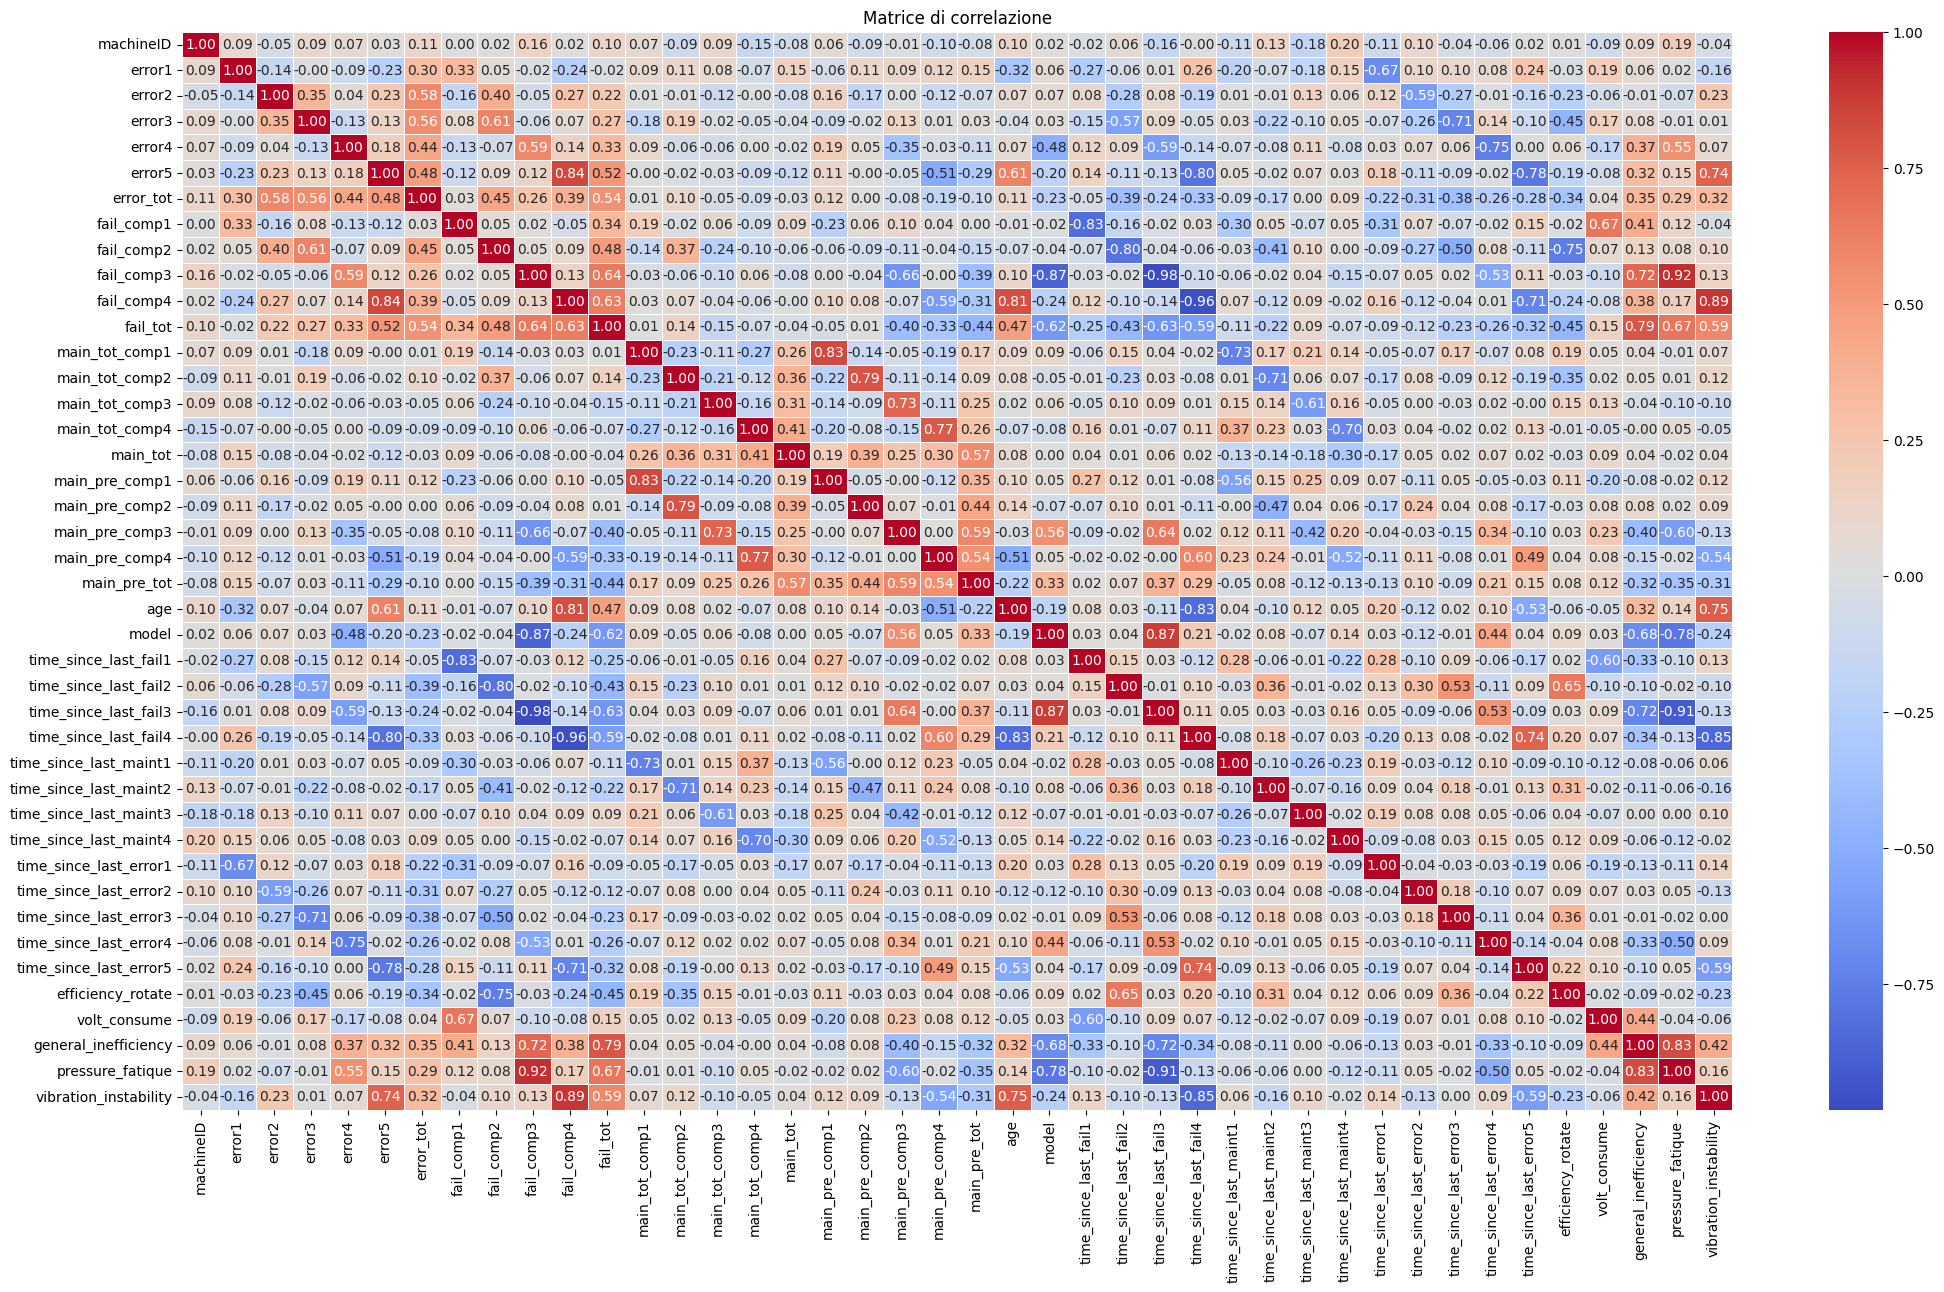

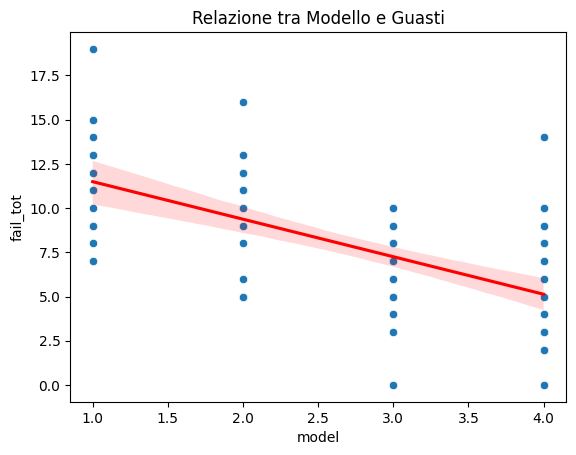

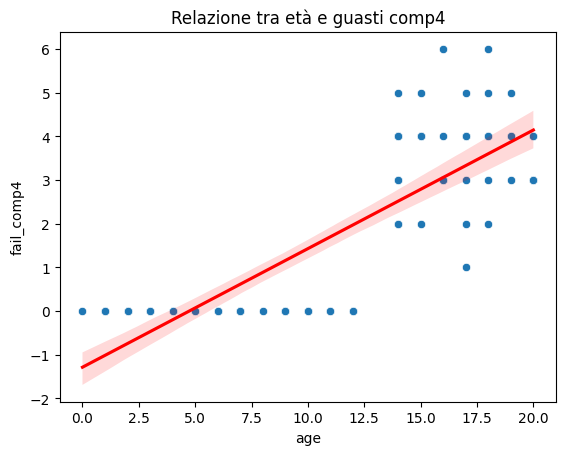

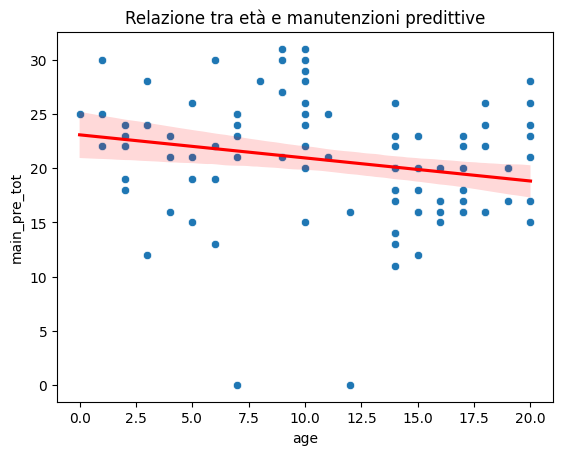

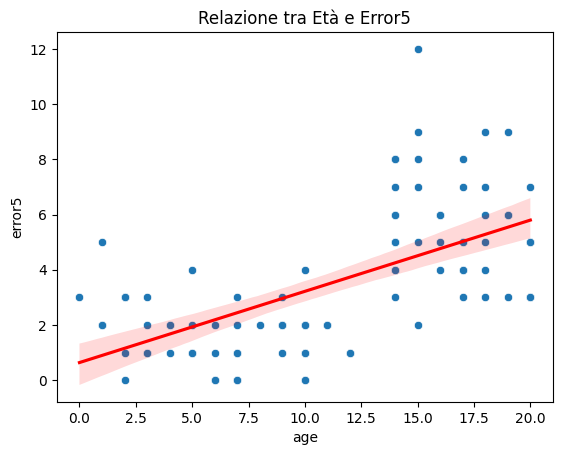

Correlazione: 0.47, P-value: 1.01e-06


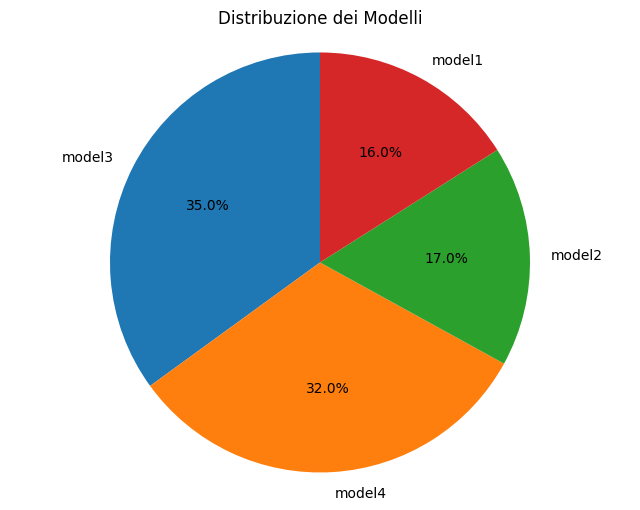

<ipython-input-7-b4292732a5e1>:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age_df = tabella_tot.groupby(pd.cut(tabella_tot.index, np.arange(0, len(tabella_tot) + 10, 10)))['age'].mean().reset_index()


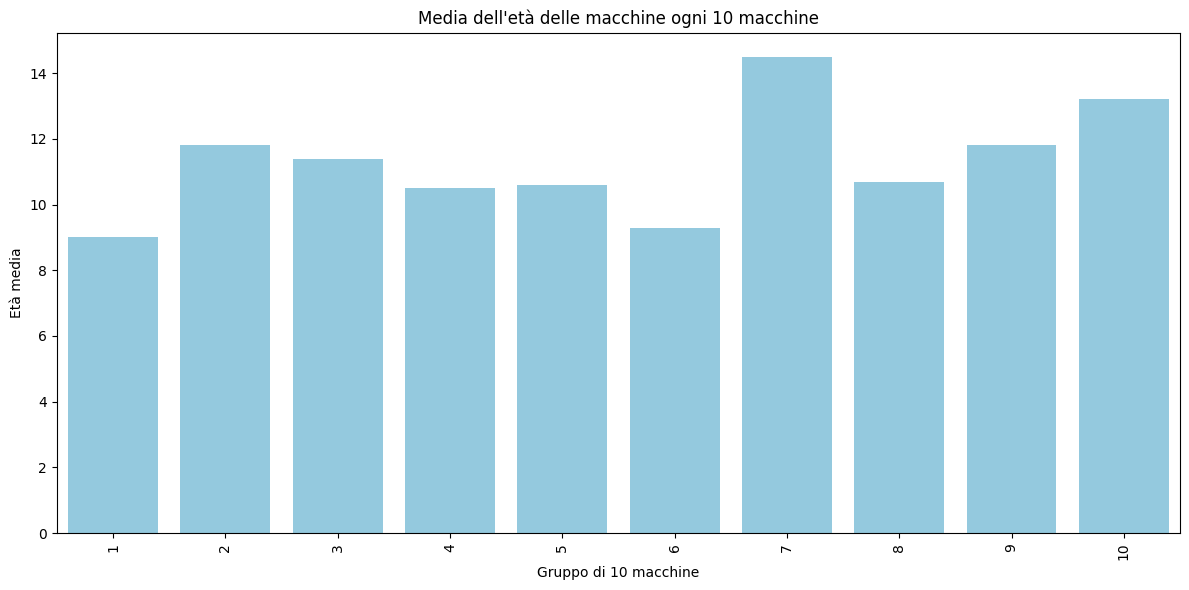

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della matrice di correlazione
correlation_matrix = tabella_tot.corr()

# Visualizzazione della heatmap
plt.figure(figsize=(25, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice di correlazione")
plt.show()

sns.scatterplot(data=tabella_tot, x='model', y='fail_tot')
sns.regplot(data=tabella_tot, x='model', y='fail_tot', scatter=False, color='red')
plt.title("Relazione tra Modello e Guasti")
plt.show()

sns.scatterplot(data=tabella_tot, x='age', y='fail_comp4')
sns.regplot(data=tabella_tot, x='age', y='fail_comp4', scatter=False, color='red')
plt.title("Relazione tra età e guasti comp4")
plt.show()

sns.scatterplot(data=tabella_tot, x='age', y='main_pre_tot')
plt.title("Relazione tra età e manutenzioni predittive")
sns.regplot(data=tabella_tot, x='age', y='main_pre_tot', scatter=False, color='red')
plt.show()

sns.scatterplot(data=tabella_tot, x='age', y='error5')
sns.regplot(data=tabella_tot, x='age', y='error5', scatter=False, color='red')
plt.title("Relazione tra Età e Error5")
plt.show()

from scipy.stats import pearsonr
corr, p_value = pearsonr(tabella_tot['age'], tabella_tot['fail_tot'])
print(f"Correlazione: {corr:.2f}, P-value: {p_value:.2e}")

num_modelli = macchine['model'].value_counts()
import matplotlib.pyplot as plt

# Creo un pie chart
plt.figure(figsize=(8, 6))
plt.pie(num_modelli.values, labels=num_modelli.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuzione dei Modelli')
plt.axis('equal')
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Crea un nuovo DataFrame con la media dell'età per gruppi di 10 macchine
mean_age_df = tabella_tot.groupby(pd.cut(tabella_tot.index, np.arange(0, len(tabella_tot) + 10, 10)))['age'].mean().reset_index()
mean_age_df['Gruppo'] = mean_age_df['age'].index + 1 # Crea una colonna 'Gruppo' per l'asse x

# Crea il bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Gruppo', y='age', data=mean_age_df, color='skyblue')
plt.title('Media dell\'età delle macchine ogni 10 macchine')
plt.xlabel('Gruppo di 10 macchine')
plt.ylabel('Età media')
plt.xticks(rotation=90)  # Potrebbe essere necessario ruotare le etichette se sono troppe
plt.tight_layout()
plt.show()





<ipython-input-8-126dc06531d6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=guasti_totali.index, y=guasti_totali.values, palette="viridis")


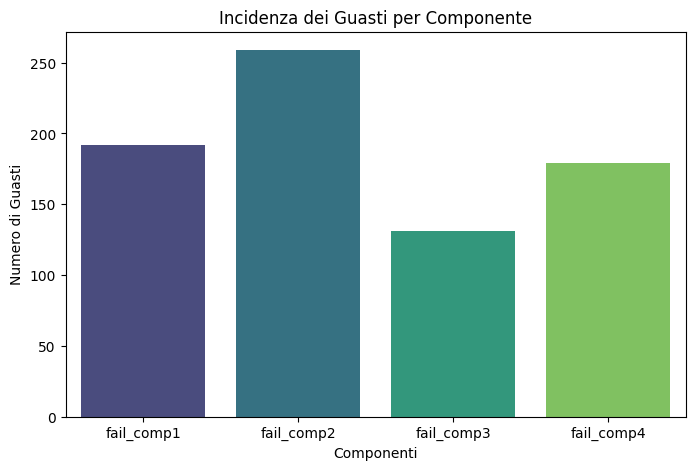

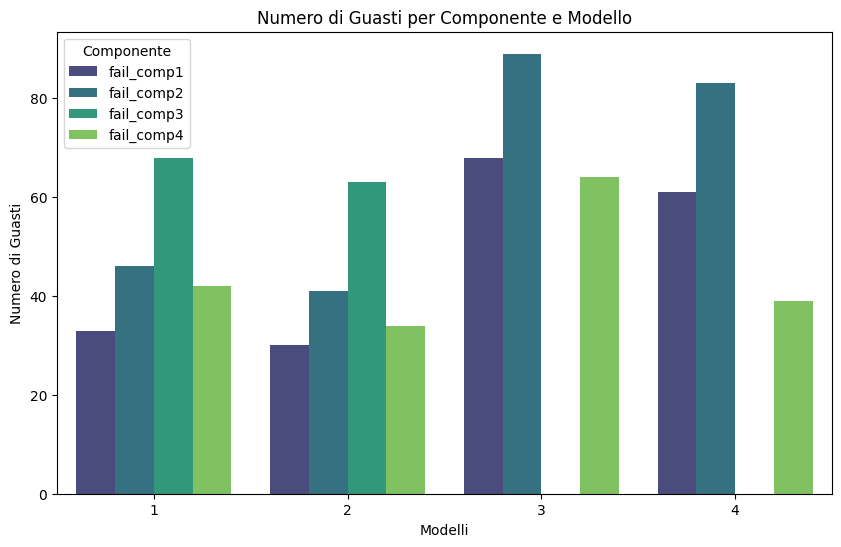

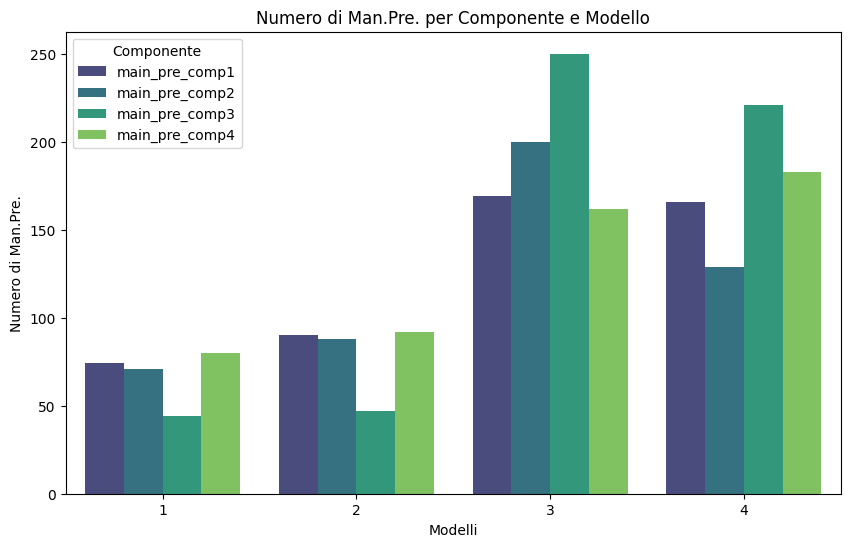

<ipython-input-8-126dc06531d6>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model', y='age', data=df, estimator='mean', palette="viridis")


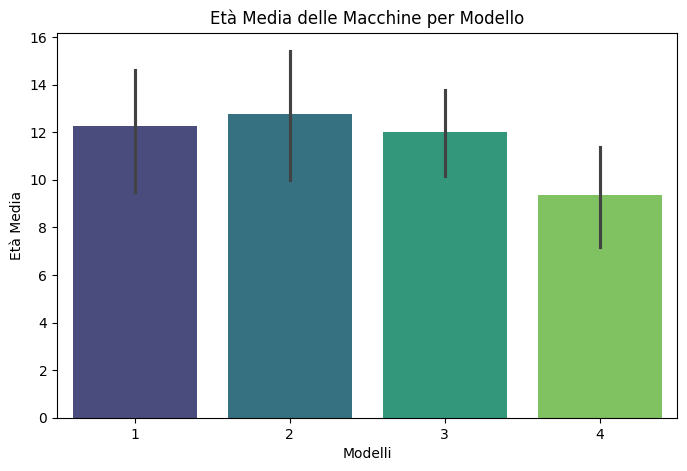

In [8]:
componenti = ['fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4']
guasti_totali = tabella_tot[componenti].sum()  # Somma totale dei guasti per ogni componente

# Grafico a barre
plt.figure(figsize=(8, 5))
sns.barplot(x=guasti_totali.index, y=guasti_totali.values, palette="viridis")
plt.xlabel("Componenti")
plt.ylabel("Numero di Guasti")
plt.title("Incidenza dei Guasti per Componente")
plt.show()

# Group by dei modelli e somma dei guasti di ogni componente
guasti_per_modello_componente = tabella_tot.groupby('model')[['fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4']].sum()
guasti_per_modello_componente = guasti_per_modello_componente.reset_index().melt(id_vars=['model'], var_name='Componente', value_name='Numero di Guasti')

# Creo un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='Numero di Guasti', hue='Componente', data=guasti_per_modello_componente, palette="viridis")
plt.xlabel("Modelli")
plt.ylabel("Numero di Guasti")
plt.title("Numero di Guasti per Componente e Modello")
plt.legend(title="Componente")
plt.show()

maint_per_modello_componente = tabella_tot.groupby('model')[['main_pre_comp1', 'main_pre_comp2', 'main_pre_comp3', 'main_pre_comp4']].sum()
maint_per_modello_componente = maint_per_modello_componente.reset_index().melt(id_vars=['model'], var_name='Componente', value_name='Numero di Man.Pre.')

# Creo un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='Numero di Man.Pre.', hue='Componente', data=maint_per_modello_componente, palette="viridis")
plt.xlabel("Modelli")
plt.ylabel("Numero di Man.Pre.")
plt.title("Numero di Man.Pre. per Componente e Modello")
plt.legend(title="Componente")
plt.show()

# Creo un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='model', y='age', data=tabella_tot, estimator='mean', palette="viridis")
plt.xlabel("Modelli")
plt.ylabel("Età Media")
plt.title("Età Media delle Macchine per Modello")
plt.show()

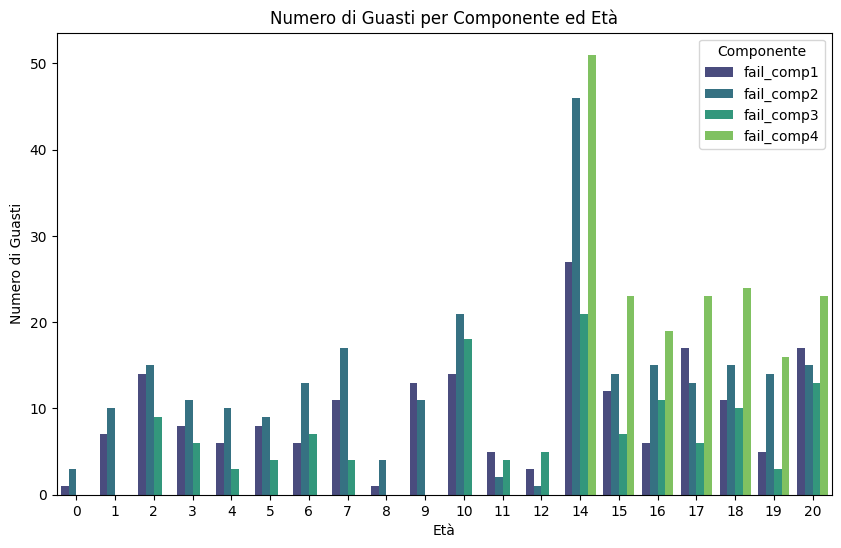

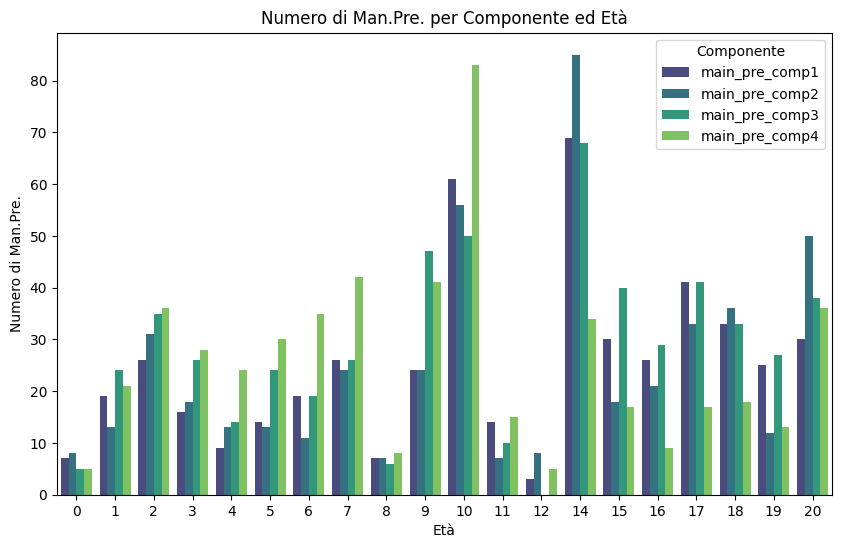

In [9]:
# Group by sull'età e somma dei guasti per ogni componente
guasti_per_età_componente = tabella_tot.groupby('age')[['fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4']].sum()
guasti_per_età_componente = guasti_per_età_componente.reset_index().melt(id_vars=['age'], var_name='Componente', value_name='Numero di Guasti')

# Creo il barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='Numero di Guasti', hue='Componente', data=guasti_per_età_componente, palette="viridis")
plt.xlabel("Età")
plt.ylabel("Numero di Guasti")
plt.title("Numero di Guasti per Componente ed Età")
plt.legend(title="Componente")
plt.show()

# Group by per età e sommo le manutenzioni preventive dei componenti
maint_per_età_componente = tabella_tot.groupby('age')[['main_pre_comp1', 'main_pre_comp2', 'main_pre_comp3', 'main_pre_comp4']].sum()
maint_per_età_componente = maint_per_età_componente.reset_index().melt(id_vars=['age'], var_name='Componente', value_name='Numero di Man.Pre.')

# Creo il barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='Numero di Man.Pre.', hue='Componente', data=maint_per_età_componente, palette="viridis")
plt.xlabel("Età")
plt.ylabel("Numero di Man.Pre.")
plt.title("Numero di Man.Pre. per Componente ed Età")
plt.legend(title="Componente")
plt.show()
